# (Ford GoBike System Data)
## by (your name here)

## Preliminary Wrangling

> This data contain the rides of bike in a bike-sharing system in an Francisco Bay area.

In [ ]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib 
import matplotlib.pyplot as plt


### load the Dataset

In [ ]:
#load the data
df = pd.read_csv('/content/201902-fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
#get the shape of the data
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [ ]:
#get info about nulls and data types


In [ ]:
#get data statistics
print(df.describe().T)


                            count         mean          std          min  \
duration_sec             183412.0   726.078435  1794.389780    61.000000   
start_station_id         183215.0   138.590427   111.778864     3.000000   
start_station_latitude   183412.0    37.771223     0.099581    37.317298   
start_station_longitude  183412.0  -122.352664     0.117097  -122.453704   
end_station_id           183215.0   136.249123   111.515131     3.000000   
end_station_latitude     183412.0    37.771427     0.099490    37.317298   
end_station_longitude    183412.0  -122.352250     0.116673  -122.453704   
bike_id                  183412.0  4472.906375  1664.383394    11.000000   
member_birth_year        175147.0  1984.806437    10.116689  1878.000000   

                                 25%          50%          75%           max  
duration_sec              325.000000   514.000000   796.000000  85444.000000  
start_station_id           47.000000   104.000000   239.000000    398.000000  
st

In [ ]:
df.duplicated().sum()

0

#### Cleaning

>- on't use in my analysis.
>- 
>- Add [Age] column from the member_birth_year column then i droped it.
>- convert the data type from  object to date time then convert it to three columns [month] , [day] and [Hour].
>-
>- 
>- 

In [ ]:
#copy the dataset
bike = df.copy()
import datetime 
today = datetime.date.today()
year = int(today.strftime("%Y"))
df['Age'] = year- df['member_birth_year'] 
df.drop('member_birth_year',axis=1 , inplace = True)


In [ ]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,38.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,50.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,33.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,48.0


In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   end_station_id           174952 non-null  float64       
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   Age                      174952 non-null  float64       
 10  start_day                174952 non-null  object        
 11  start_hour               174952 non-null  int64         
dtypes: datetime64[ns

In [ ]:
#drop the member_birth year column
#convert the data type from  object to date time

#Return Indexes formatted strings specified by date_format (day , month , hour)
#df['trip_month'] = df.start_time.dt.strftime('%b')
#convert the Age and trip_hour data type to int


In [ ]:
df.dropna(inplace=True)


In [ ]:
print(df.shape)
print(df.columns)
df['member_gender'].value_counts()

(174952, 12)
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_gender', 'bike_share_for_all_trip', 'Age'],
      dtype='object')


Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [ ]:
# drop uesless columns 

df.drop(['start_station_latitude','start_station_longitude','start_station_name',
         'end_station_latitude','end_station_longitude','end_station_name'],inplace = True, axis=1)

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,13.0,4902,Customer,Male,No,38.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,3.0,5905,Customer,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,70.0,6638,Subscriber,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,222.0,4898,Subscriber,Male,Yes,48.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,323.0,5200,Subscriber,Male,No,63.0


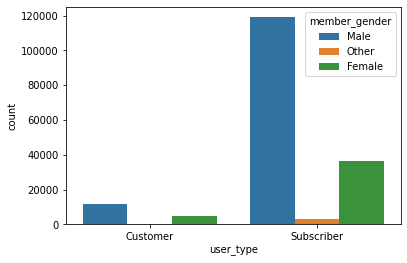

In [ ]:
# the gender of user types
sns.countplot(data = df, x = 'user_type',hue='member_gender')
# all the other gender are subscibers users


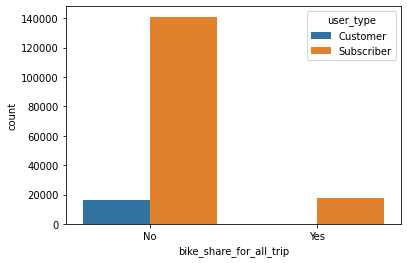

In [ ]:
sns.countplot(data = df , x='bike_share_for_all_trip',hue='user_type')
# There is no customer ride a bike share for all trip


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

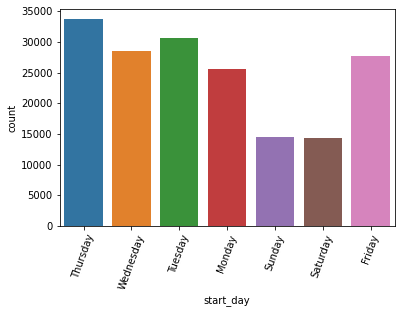

In [ ]:
# which day of the week has the max trips
df['start_day'] = df['start_time'].dt.strftime('%A')
sns.countplot(data = df , x='start_day')
plt.xticks(rotation=70)

#they are equivalent  but Saturday and Sunday are the least

(array([ 1773.,   391.,  4157., 45640., 15428., 16311., 29783., 37002.,
        15628.,  8764.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

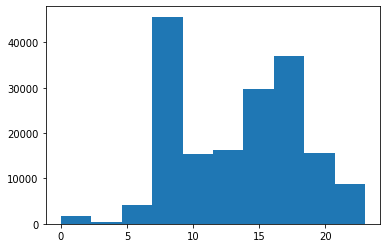

In [ ]:
plt.hist(data = df, x='start_hour')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

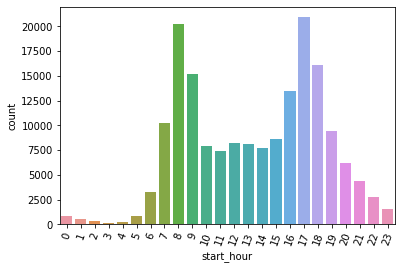

In [ ]:
# which hour of the day has the max trips ?? 
df['start_hour'] = df['start_time'].dt.hour
sns.countplot(data = df , x='start_hour')
plt.xticks(rotation=70)
# Here is the answer

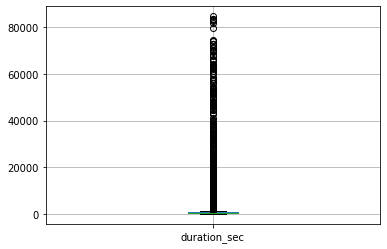

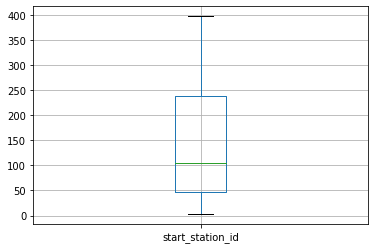

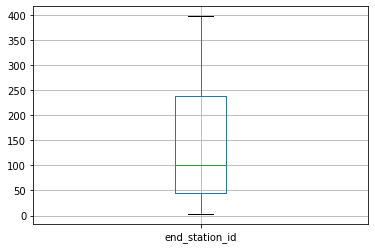

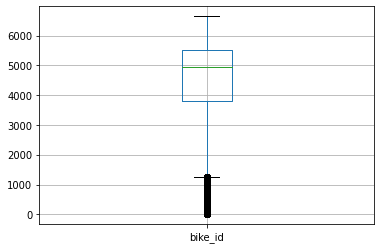

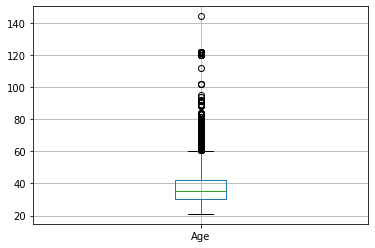

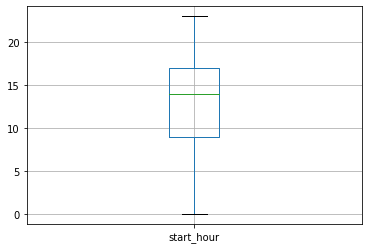

In [ ]:
# box plot for all numerical columns to check the outliers
for col in df.select_dtypes(exclude=['object','datetime64[ns]']).columns:
  plt.figure()
  df.boxplot(col)

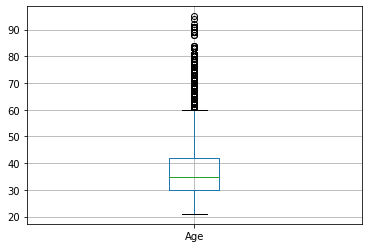

In [ ]:
# There is outliers in the Age columns 
df = df[df['Age']<100]
df.boxplot('Age')

(array([1.73781e+05, 6.71000e+02, 1.46000e+02, 7.50000e+01, 3.90000e+01,
        2.60000e+01, 1.20000e+01, 1.80000e+01, 1.70000e+01, 8.00000e+00,
        1.00000e+01, 1.10000e+01, 1.40000e+01, 8.00000e+00, 1.30000e+01,
        7.00000e+00, 8.00000e+00, 6.00000e+00, 1.00000e+00, 6.00000e+00]),
 array([6.100000e+01, 4.285350e+03, 8.509700e+03, 1.273405e+04,
        1.695840e+04, 2.118275e+04, 2.540710e+04, 2.963145e+04,
        3.385580e+04, 3.808015e+04, 4.230450e+04, 4.652885e+04,
        5.075320e+04, 5.497755e+04, 5.920190e+04, 6.342625e+04,
        6.765060e+04, 7.187495e+04, 7.609930e+04, 8.032365e+04,
        8.454800e+04]),
 <a list of 20 Patch objects>)

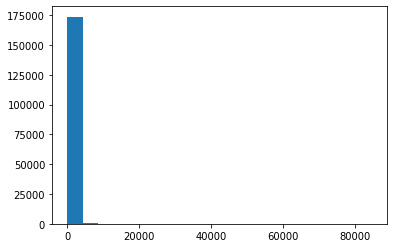

In [ ]:
plt.hist(data=df,x='duration_sec',bins=20)

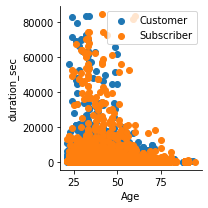

In [ ]:
g = sns.FacetGrid(data = df,hue='user_type')
g.map(plt.scatter , 'Age','duration_sec')
plt.legend()
# both the customer and the subscriber share in the long and short duration time


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x504 with 0 Axes>

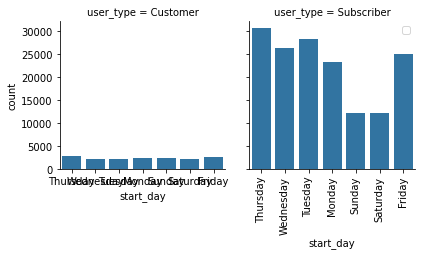

In [ ]:
plt.figure(figsize = [20,7])
g = sns.FacetGrid(data = df,col='user_type')
g.map(sns.countplot , 'start_day')
plt.xticks(rotation = 90)
plt.legend()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


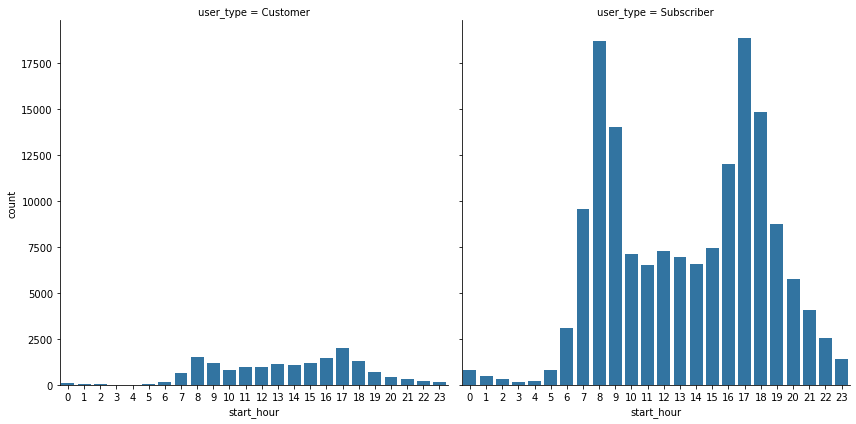

In [ ]:
# in which hour the customer make a trip 
g = sns.FacetGrid(data = df, col = 'user_type',size=6)
g.map(sns.countplot, 'start_hour')



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


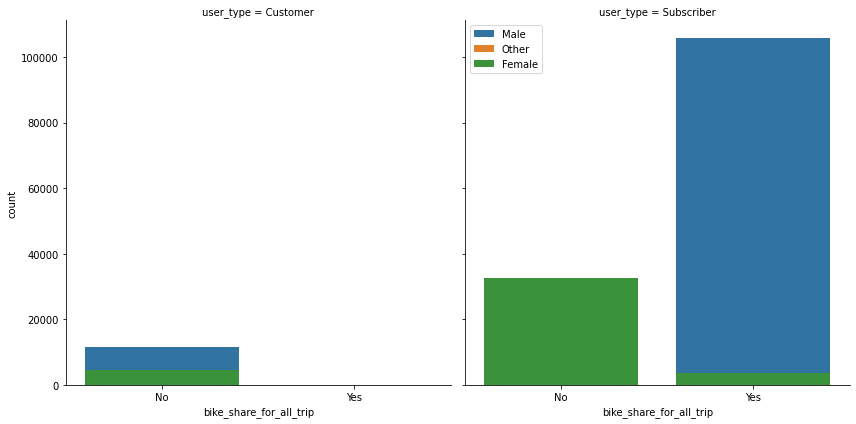

In [ ]:
# in which hour the customer make a trip 
g = sns.FacetGrid(data = df, col = 'user_type',hue='member_gender',size=6)
g.map(sns.countplot, 'bike_share_for_all_trip')
plt.legend()
# all the subscriber men bikes are shareing for all trips


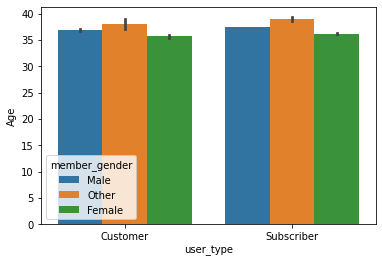

In [ ]:
sns.barplot(data = df,x = "user_type", y = "Age", hue = "member_gender");


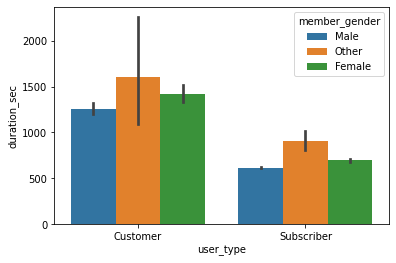

In [ ]:
sns.barplot(data = df,x = "user_type", y = "duration_sec", hue = "member_gender");
# other win 

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,Age,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,13.0,4902,Customer,Male,No,38.0,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,3.0,5905,Customer,Male,No,50.0,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,70.0,6638,Subscriber,Other,No,33.0,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,222.0,4898,Subscriber,Male,Yes,48.0,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,323.0,5200,Subscriber,Male,No,63.0,Thursday,23
